# Sage's EDA

In [1]:
import pandas as pd  # dataset
import seaborn as sns  #visualization (plottings)
import matplotlib.pyplot as plt  #visualization
import numpy as np  # arrays, algebra, dealing with numbers
from sklearn.preprocessing import normalize

In [2]:
music = pd.read_csv('Spotify_Youtube.csv')
music = music[['Loudness', 'Speechiness', 'Acousticness']]
display(music)

,Loudness,Speechiness,Acousticness
0,-6.679,0.1770,0.008360
1,-5.815,0.0302,0.086900
2,-3.930,0.0522,0.042500
3,-5.810,0.0260,0.000015
4,-8.627,0.1710,0.025300
...,...,...,...
20135,-6.344,0.0328,0.448000
20136,-1.786,0.1370,0.028000
20137,-4.679,0.0647,0.024300
20138,-4.004,0.4190,0.356000


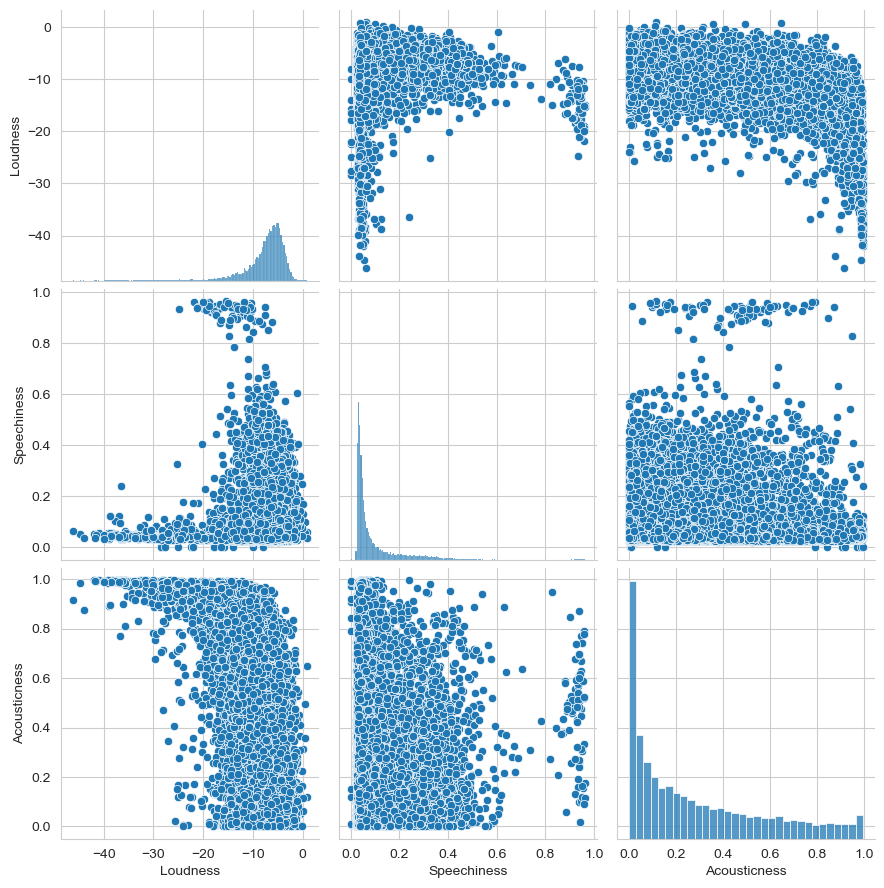

In [3]:
sns.set_style("whitegrid");
sns.pairplot(music, height=3);

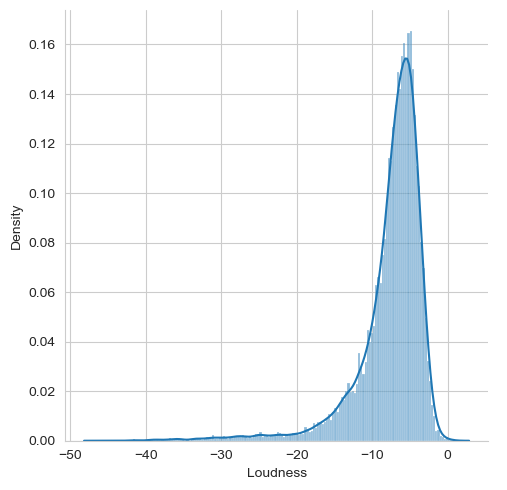

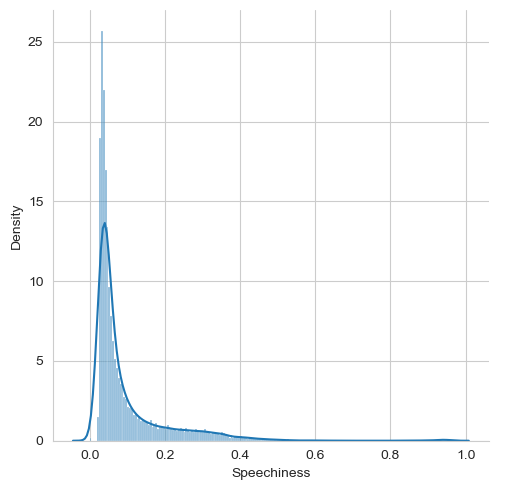

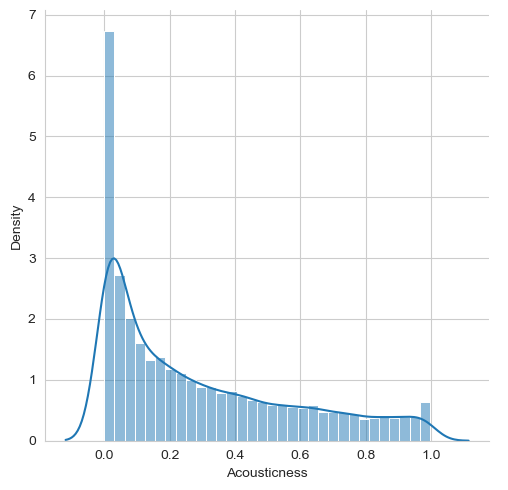

In [4]:
sns.FacetGrid(music, height=5) \
    .map(sns.histplot,'Loudness', kde=True, stat="density", kde_kws=dict(cut=3)) \
    .add_legend();

sns.FacetGrid(music, height=5) \
    .map(sns.histplot,'Speechiness', kde=True, stat="density", kde_kws=dict(cut=3)) \
    .add_legend();

sns.FacetGrid(music, height=5) \
    .map(sns.histplot,'Acousticness', kde=True, stat="density", kde_kws=dict(cut=3)) \
    .add_legend();

<Axes: >

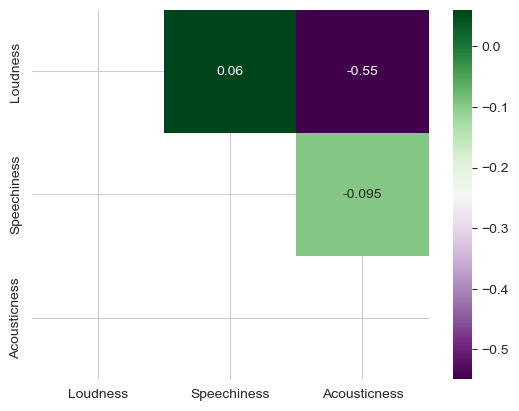

In [5]:
mask = np.tril(music.corr())
sns.heatmap(music.corr(), annot=True, cmap='PRGn', mask=mask, square=False)

In [6]:
print(max(music['Loudness'])) 
# they must be using a high reference pressure as the max is 0.92

0.92


## Analysis
These three variables don't seem to correlate very strongly with each other except for loudness and acousticness, which seem strongly inversely correlated. This makes sense because acoustic music tends to aim for a softer feel because it is not using electronic amplification. 

The graphs make it look like these three variables are more correlated than they are, but that is likely because the data itself is skewed. Loudness is reported in decibels (dB) which are on a log scale. Speechiness and acousticness look very skewed towards the low end of the scale, which makes sense according to my understanding of the music industry. 

Overall, I think it would make a lot of sense to transform this data because of how skewed it is.